<a href="https://colab.research.google.com/github/heidimag/DS1000/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7

In this lab we discuss:

1. Two-way table
2. Mosaic plot
2. Conditional and marginal proportions
3. Relative risk, and odds ratio


## Two-way Table

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
#pip install statsmodels --upgrade

The `titanic.csv` file contains data for 891 of the real Titanic passengers.

Each row represents one person. The columns describe different attributes about the person including
whether they survived, their ID, their ticket-class, and their gender.

In [3]:
# Read .csv data
df = pd.read_csv("titanic.csv")
df.head()

,PassengerID,LivingStatus,TicketClass,Sex
0,1,Died,3,male
1,2,Survived,1,female
2,3,Survived,3,female
3,4,Survived,1,female
4,5,Died,3,male


### Two-way tables

A two-way table describes two categorical variables, organizing counts according to a row variable and a column variable. In Python we can use the `crosstab` function from the `pandas` library to create this type of table. Let's see how to do it in practice using the titanic dataset.

**pd.crosstab:** https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [5]:
# Two-way Table of LivingStatus vs. Sex
twoway_table = pd.crosstab(index = df["LivingStatus"], columns = df["Sex"])
twoway_table

Sex,female,male
LivingStatus,,
Died,81,468
Survived,233,109


#### Another way

So we can create a two-way table to represent two categorical variables in a way that we have one column for each variable and a third column with the number of observations in each combination of the categorical variables.

Also, this alternative way allows us to easily create a bidimensional barplot.

In [6]:
table_new = twoway_table.stack().reset_index().rename(columns = {0:'Count'})
table_new

,LivingStatus,Sex,Count
0,Died,female,81
1,Died,male,468
2,Survived,female,233
3,Survived,male,109


**sns.barplot:** https://seaborn.pydata.org/generated/seaborn.barplot.html

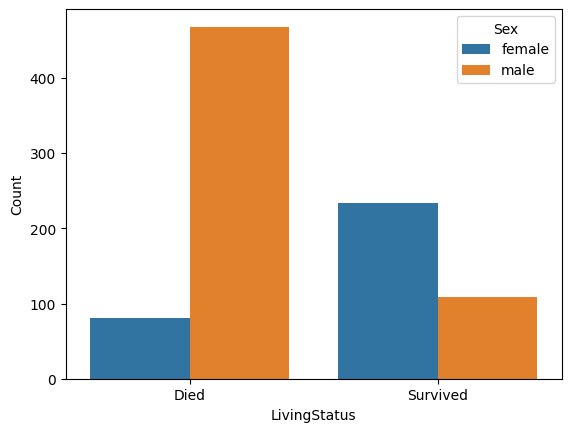

In [7]:
# Let's create a bidimensional barplot.
sns.barplot(x = "LivingStatus", hue = "Sex", y = "Count", data = table_new)
plt.show()

**mosaicplot:** https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html

The mosaic plot is a graphical method for visualizing data from two categorical variables. It shows the existing relationship between the two variables but also the marginal distribution of each categorical variable.

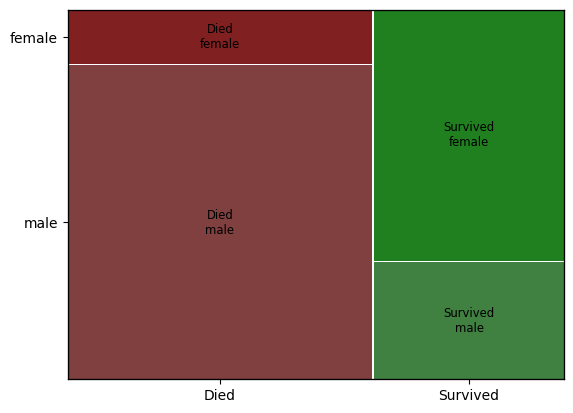

In [8]:
# Simple mosaic plot, without counts or percentages
mosaic(df, ['LivingStatus', 'Sex'])
plt.show()

**lambda** https://www.w3schools.com/python/python_lambda.asp

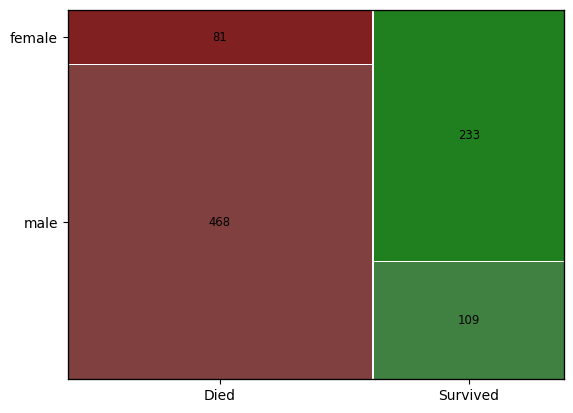

In [9]:
# Bonus! Adding the counts to the mosaic plot
labelizer = lambda k:{('Died', 'female'):81, ('Died', 'male'):468,
                      ('Survived', 'female'):233, ('Survived', 'male'):109}[k]

mosaic(df, ['LivingStatus', 'Sex'], labelizer = labelizer)
plt.show()

## Marginal and Conditional Proportions


### Marginal distribution
The marginal distribution of one of the categorical variables, in a two-way table of counts, is the distribution of values of that variable among all individuals described by the table. However marginal distributions tell us nothing about the relationship between two variables.


To get the marginal distribution of a variable in a Two-way table you need to compute the total for each row/column. Let's see an example.

In [10]:
# Table of LivingStatus vs. TicketClass
# Getting the marginal counts (totals for each row and column)
pd.crosstab(index = df["LivingStatus"], columns = df["TicketClass"],
            margins = True)

TicketClass,1,2,3,All
LivingStatus,,,,
Died,80,97,372,549
Survived,136,87,119,342
All,216,184,491,891


### Conditional distribution

A conditional distribution of a variable describes the values of that variable among individuals who have a given value of another variable.

In [11]:
# Living Status given Ticket Class (divide each entry by the column totals)
pd.crosstab(index = df["LivingStatus"], columns = df["TicketClass"],
            normalize = 'columns')

TicketClass,1,2,3
LivingStatus,,,
Died,0.37037,0.527174,0.757637
Survived,0.62963,0.472826,0.242363


In [12]:
# Ticket Class given Living Status  (divide each entry by the row totals)
pd.crosstab(index = df["LivingStatus"], columns = df["TicketClass"],
            normalize = 'index')

TicketClass,1,2,3
LivingStatus,,,
Died,0.145719,0.176685,0.677596
Survived,0.397661,0.254386,0.347953


In [13]:
# Getting the total proportion of counts in each cell (dividing the table by the grand total)
# and the marginal proportions
pd.crosstab(index = df["LivingStatus"], columns = df["TicketClass"],
            normalize = 'all', margins=True)

TicketClass,1,2,3,All
LivingStatus,,,,
Died,0.089787,0.108866,0.417508,0.616162
Survived,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


In [17]:
#help(pd.crosstab)

**Practice:**

Create a two-way table with the conditional proportions for the distribution of `LivingStatus` GIVEN `Sex`. Just like we did for Ticket Class and Living Status.

In [15]:
## your code here
pd.crosstab(index = df["LivingStatus"], columns = df["Sex"],
            normalize = 'columns')

Sex,female,male
LivingStatus,,
Died,0.257962,0.811092
Survived,0.742038,0.188908


## Relative Risk and Odds Ratio

**Relative Risk:** of outcome for two categories of explanatory variable is ratio of risks for each category.

**Odds Ratio:** ratio of the odds of getting the disease to the odds of not getting the disease.

Let's create a toy example to see how can we compute relative risk and odds ratio. Our data illustrates the number of cancer cases versus non-cancer cases for smokers and non-smokers.

In [18]:
df_new = pd.DataFrame({'Cancer-Yes':[30, 10], 'Cancer-No':[70, 90]},
                      index = ['Smoker', 'Non-Smoker'])
df_new

,Cancer-Yes,Cancer-No
Smoker,30,70
Non-Smoker,10,90


In [19]:
# let us calculate the proportions of developing cancer conditional on smoking status
p_smoker = 30/100
p_nonsmoker = 10/100

In [20]:
# the relative risk of developing cancer in the smoker group compared to non-smokers is:
RR = p_smoker/p_nonsmoker
print(RR)
round(RR,2)

2.9999999999999996


3.0

**sm.stats.Table2x2:** https://www.statsmodels.org/stable/generated/statsmodels.stats.contingency_tables.Table2x2.html

In [21]:
# Alternative way to find the relative risk
array = np.array([[30, 70], [10, 90]])
relative_risk = sm.stats.Table2x2(array).riskratio
print('Relative Risk =',round(relative_risk,2))

Relative Risk = 3.0


In [22]:
# Now we can also find the odds ratio (OR) of developing cancer
# in the smoker group compared to non-smokers:
odds_smoker = 30/70
odds_nonsmoker = 10/90
OR = odds_smoker/odds_nonsmoker
print('The odds ratio is', round(OR,2))

The odds ratio is 3.86


In [23]:
# Alternative way to find the odds ratio
odds_ratio = sm.stats.Table2x2(array).oddsratio
print('Odds Ratio =', odds_ratio.round(2))

Odds Ratio = 3.86
